# Import the necessary packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
=

# Import the Dataset

In [5]:
df = pd.read_csv('card_transdata.csv')
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

# Verifying duplicate in the dataset

In [7]:
duplicates = df[df.duplicated()]
duplicates.head(8)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


# Removing duplicates by considering only the first occurence

In [8]:
clean_data = df.drop_duplicates()
clean_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Shape of the dataset

In [9]:
clean_data.shape

(1000000, 8)

# Shape of the dataset after removing duplicates

In [10]:
clean_data.shape

(1000000, 8)

# check the data Types

In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


# calculating umber of unique values in each column

In [12]:
clean_data.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

# Examine the dataset statical properties, summarizing individual columns with metrics like minimum, maximum, and mean values

In [13]:
clean_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Identifying missing values

In [14]:
clean_data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [15]:
clean_data = clean_data.fillna(clean_data.mean())


# creating a Correlation matrix for the numerical attributes.

<function matplotlib.pyplot.show(close=None, block=None)>

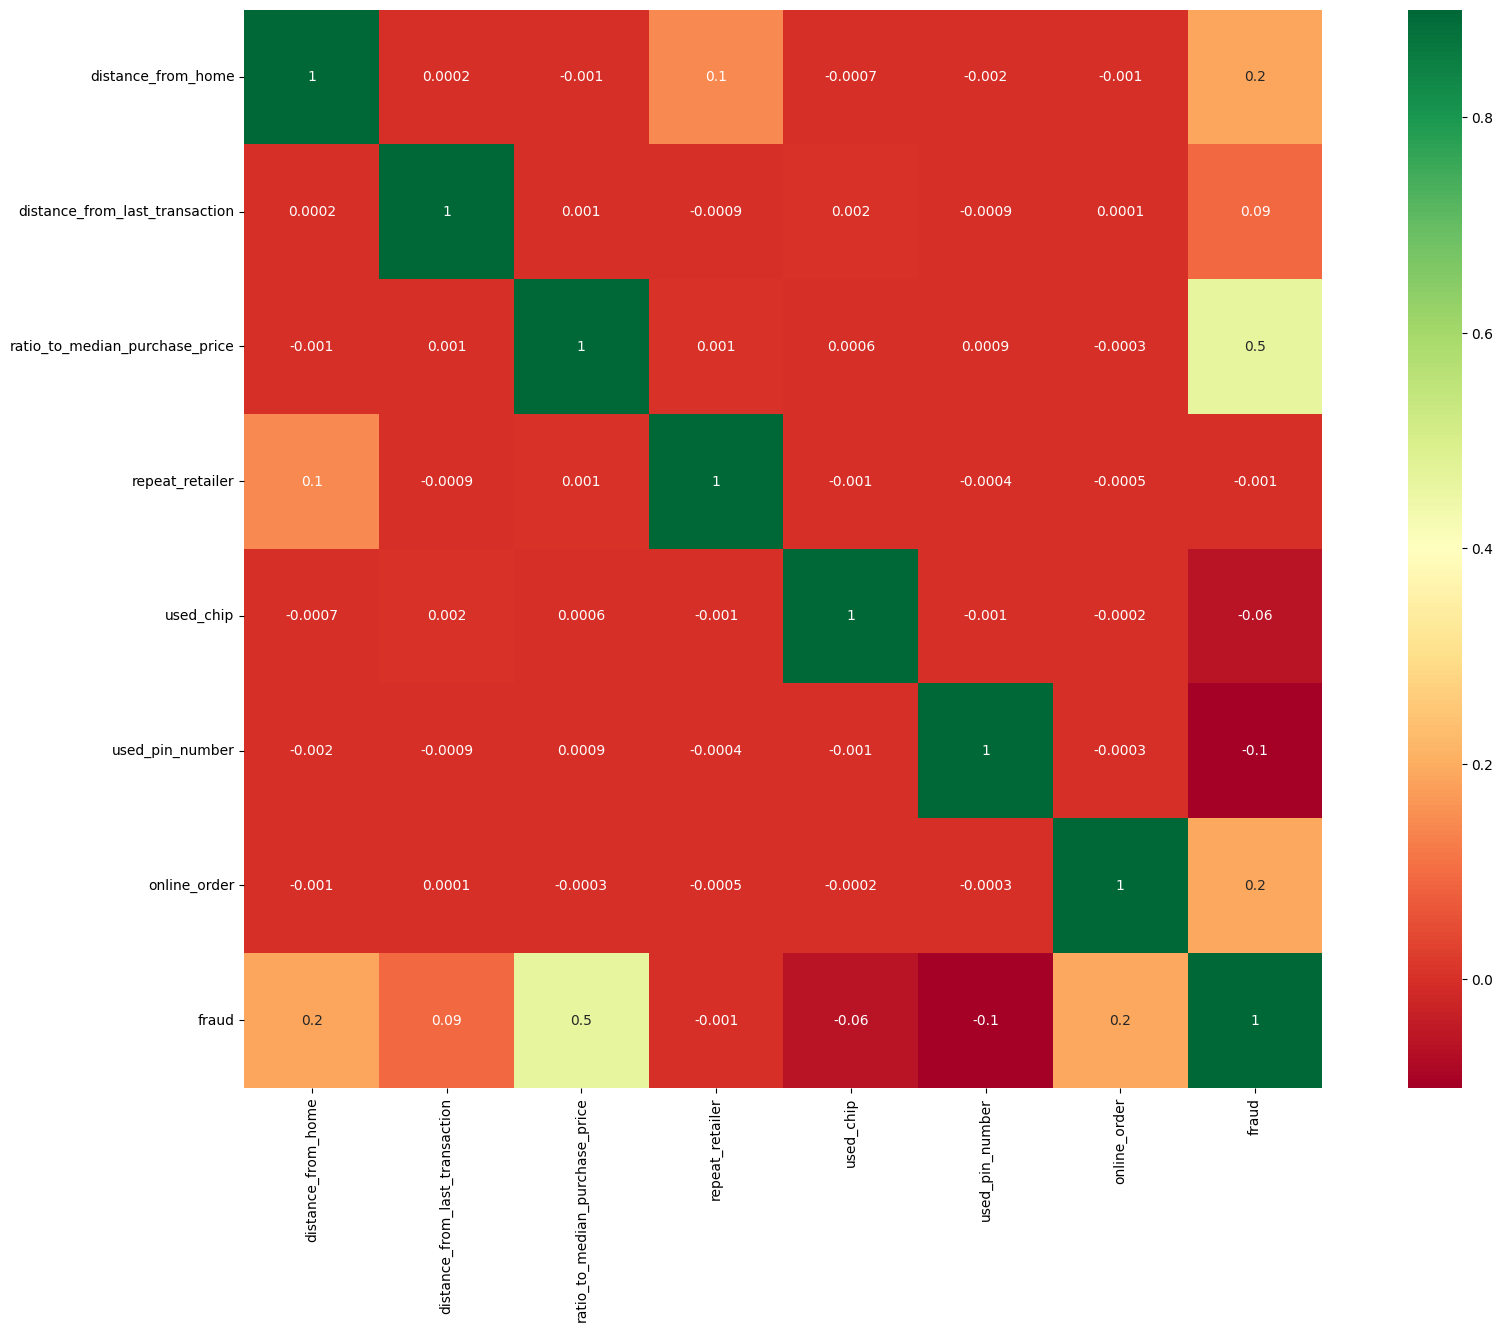

In [16]:
corrmat = clean_data.corr()
plt.subplots(figsize=(22,14))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='RdYlGn',fmt='.0g')
plt.show

# Analyzing the Fraud Feature.

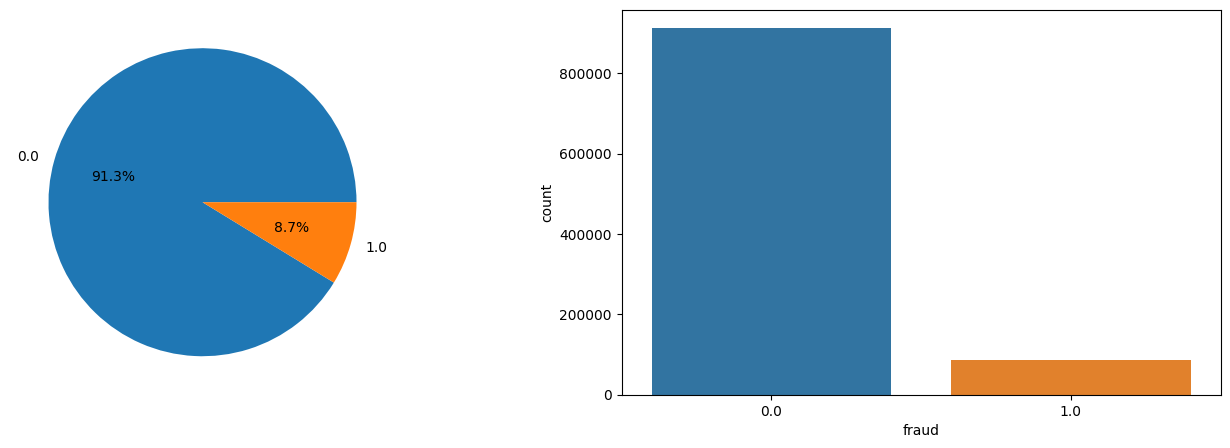

In [17]:
f, ax = plt.subplots(1,2, figsize=(17,5))
clean_data.fraud.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0],label="")
sns.countplot(data=clean_data, x='fraud')
plt.show()


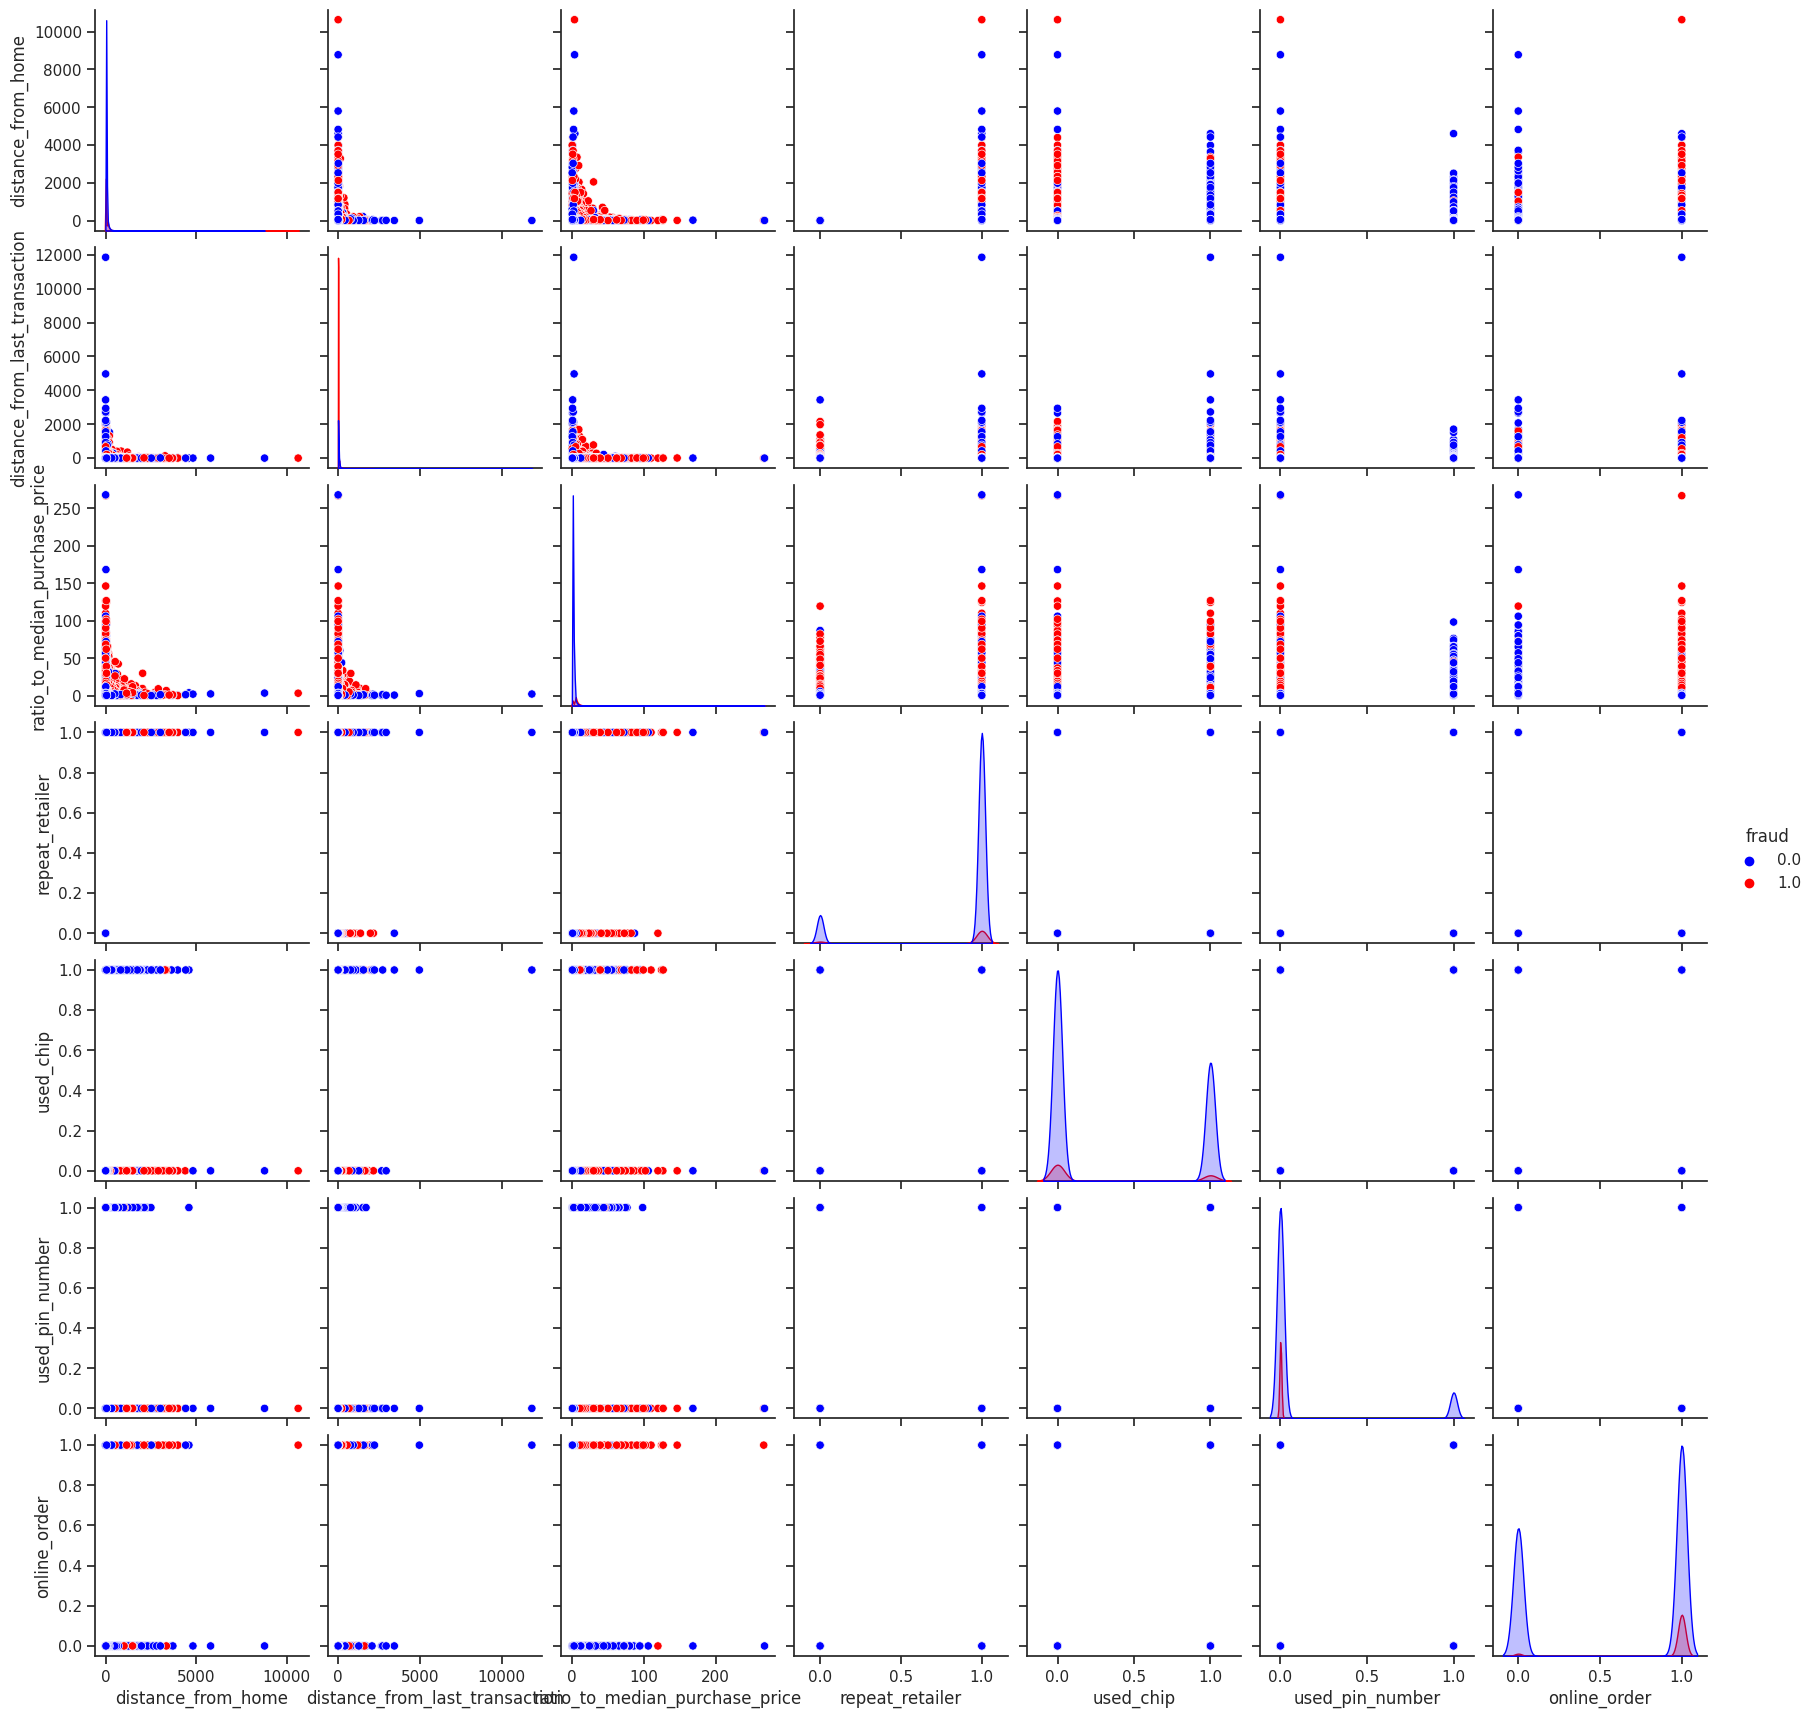

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {
    0: 'blue',
    1: 'red'
}

sns.set(style="ticks")
sns.pairplot(clean_data, hue='fraud', diag_kind='kde', palette=custom_palette)
plt.show()


In [19]:
# @title Box plot


In [20]:
# @title pair plot


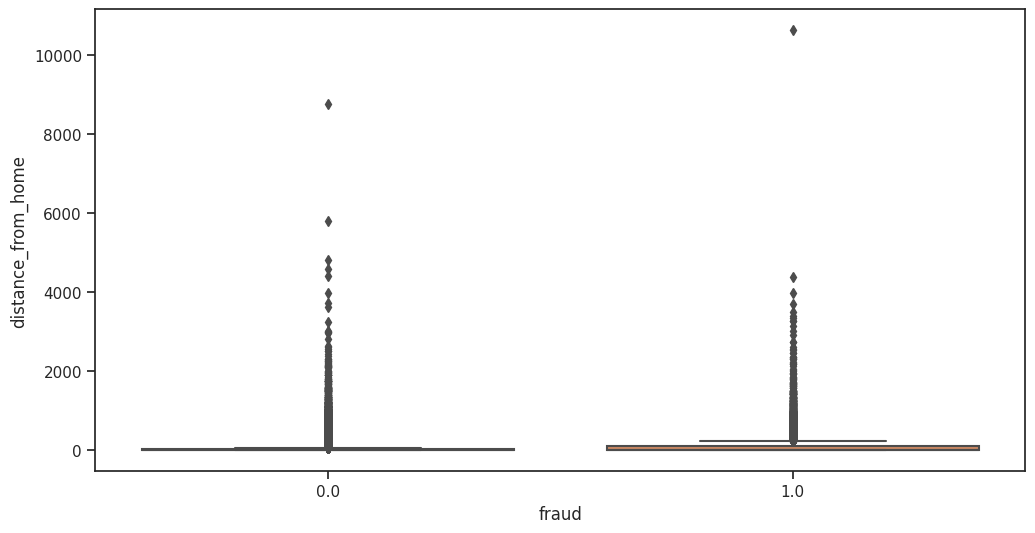

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='fraud', y='distance_from_home', data=clean_data)
plt.show()


In [22]:
limit = 87403
not_fraud = clean_data[clean_data['fraud'] == 0].sample(limit, random_state=42)
fraud = clean_data[clean_data['fraud'] == 1].sample(limit, random_state=42)
balanced_data = pd.concat([not_fraud, fraud])


In [23]:
balanced_data.tail(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
72834,0.970916,0.948336,22.339502,0.0,1.0,0.0,1.0,1.0
627316,51.062774,0.375682,7.005275,1.0,1.0,0.0,1.0,1.0
878356,2.856701,0.363480,4.406697,1.0,1.0,0.0,1.0,1.0
10198,67.025604,37.513968,4.139320,1.0,0.0,0.0,1.0,1.0
181773,5.204690,1.690492,4.652454,1.0,1.0,0.0,1.0,1.0


In [24]:
balanced_data['fraud'].value_counts()

0.0    87403
1.0    87403
Name: fraud, dtype: int64

# Dividing x and y

In [25]:
X = balanced_data.drop(columns=["fraud"])
y = balanced_data["fraud"]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


# scalling


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [28]:
print(X_scaled.shape)
print(y.shape)

(174806, 7)
(174806,)


In [29]:
print(X_scaled.shape)
print(y.shape)

(174806, 7)
(174806,)


# Dividing data in to training, and testing sets.

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=15,shuffle=True)

In [31]:
y_train = np.array(y_train)


In [32]:
print("Train set size :" , X_train.shape)
print("Test set size :" , X_test.shape)


Train set size : (122364, 7)
Test set size : (52442, 7)


# Import the necessary libraries for the models

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB




#

# Create a function for evaluation that provides all relevant metrics after training a machine learning model.

#

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

#

In [35]:
models = {
    "Logistic Regression": LogisticRegression(C=10),
    "KNearest Neighbours": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(C=100, kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_split=10, n_estimators=50),
    "Naive Bayes": GaussianNB()
}

# Models Training

#

In [36]:


model_list=[]
best_model = None
best_accuracy = 0.0

def tune_parameters(model_name, model, param_grid, X_train, y_train):
    print(f"Tuning parameters for {model_name}...")

    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    best_model = grid_search.best_estimator_

    return best_model


def evaluate_and_display(model,model_name,X_train,y_train,X_test,y_test):
    global best_accuracy, best_model
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    confusion_test = confusion_matrix(y_test, y_test_pred)
    confusion_train = confusion_matrix(y_train, y_train_pred)

    report_train = classification_report(y_train, y_train_pred)
    report_test = classification_report(y_test, y_test_pred)

    print(type(model).__name__)
    model_list.append(type(model).__name__)

    print("Accuracy train score: {:.4f}".format(accuracy_train))

    print('----------------------------------')

    print("Accuracy test score: {:.4f}".format(accuracy_test))

    print('----------------------------------')

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('----------------------------------')

    print(f"Classification Report - Training:\n{report_train}")

    print('----------------------------------')

    print(f"Classification Report - Testing:\n{report_test}")

    print('----------------------------------')

    print("Plot the confusion matrix for training")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Training")
    plt.show()

    print('----------------------------------')

    print("Plot the confusion matrix for testing")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Testing")
    plt.show()

    print('='*35)
    print('\n')



    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = model_name




LogisticRegression
Accuracy train score: 0.9313
----------------------------------
Accuracy test score: 0.9325
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 0.2621
- Mean Absolute Error: 0.0687
- R2 Score: 0.7251
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2599
- Mean Absolute Error: 0.0675
- R2 Score: 0.7298
----------------------------------
Classification Report - Training:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     61197
         1.0       0.93      0.94      0.93     61167

    accuracy                           0.93    122364
   macro avg       0.93      0.93      0.93    122364
weighted avg       0.93      0.93      0.93    122364

----------------------------------
Classification Report - Testing:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     26206
         1.0  

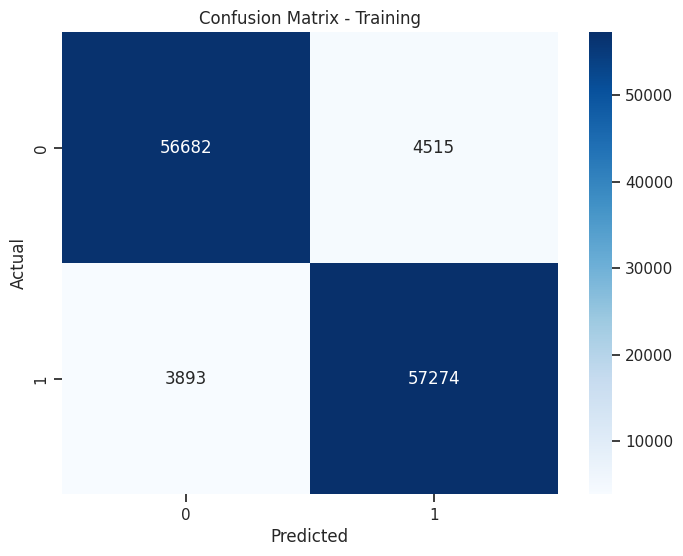

----------------------------------
Plot the confusion matrix for testing


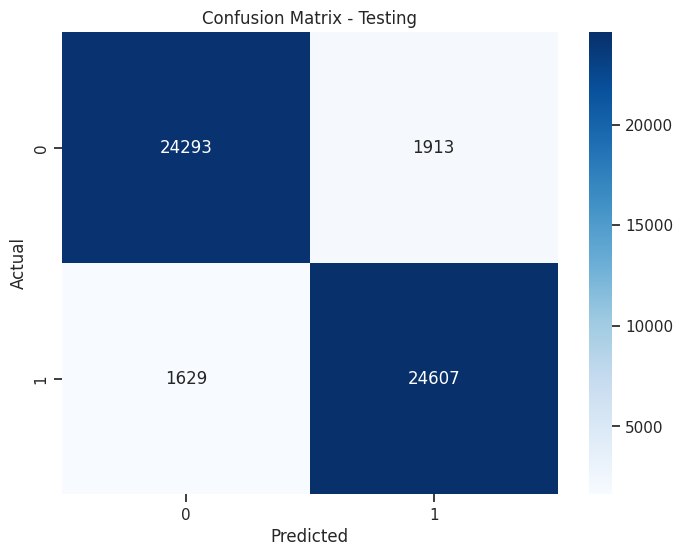



KNeighborsClassifier
Accuracy train score: 0.9986
----------------------------------
Accuracy test score: 0.9972
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 0.0378
- Mean Absolute Error: 0.0014
- R2 Score: 0.9943
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0529
- Mean Absolute Error: 0.0028
- R2 Score: 0.9888
----------------------------------
Classification Report - Training:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61197
         1.0       1.00      1.00      1.00     61167

    accuracy                           1.00    122364
   macro avg       1.00      1.00      1.00    122364
weighted avg       1.00      1.00      1.00    122364

----------------------------------
Classification Report - Testing:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26206
         1

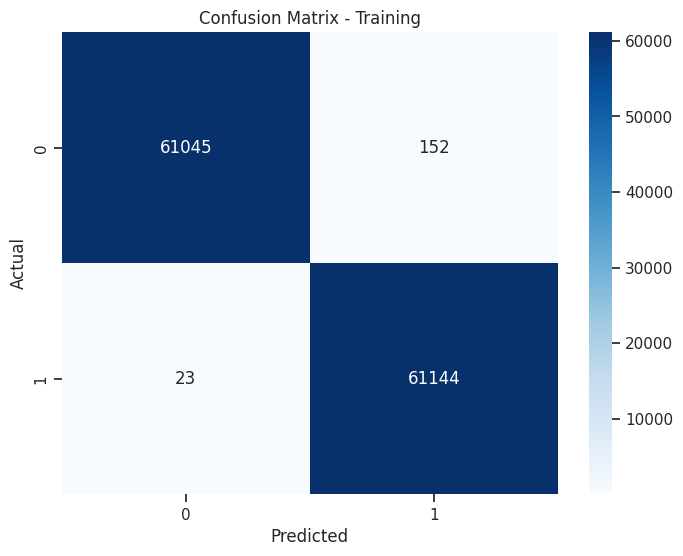

----------------------------------
Plot the confusion matrix for testing


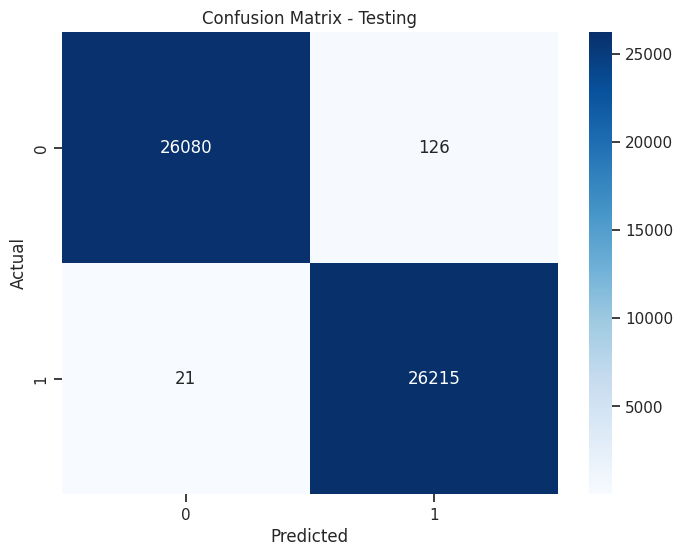



SVC
Accuracy train score: 0.9687
----------------------------------
Accuracy test score: 0.9678
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 0.1769
- Mean Absolute Error: 0.0313
- R2 Score: 0.8749
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1794
- Mean Absolute Error: 0.0322
- R2 Score: 0.8713
----------------------------------
Classification Report - Training:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     61197
         1.0       0.96      0.98      0.97     61167

    accuracy                           0.97    122364
   macro avg       0.97      0.97      0.97    122364
weighted avg       0.97      0.97      0.97    122364

----------------------------------
Classification Report - Testing:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     26206
         1.0       0.96    

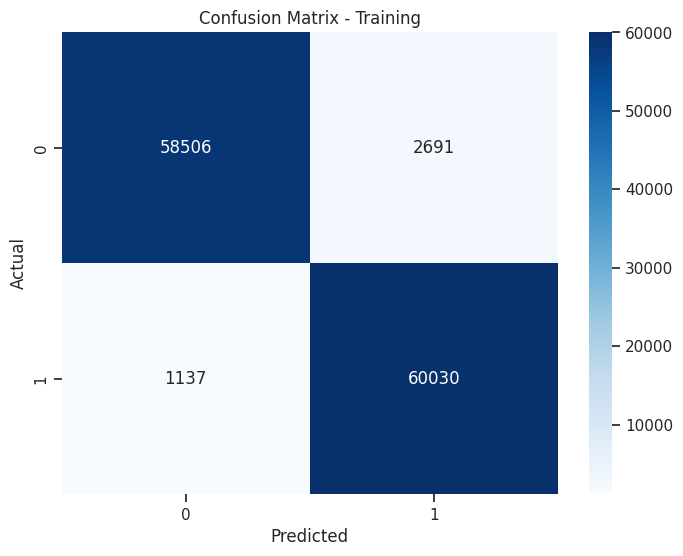

----------------------------------
Plot the confusion matrix for testing


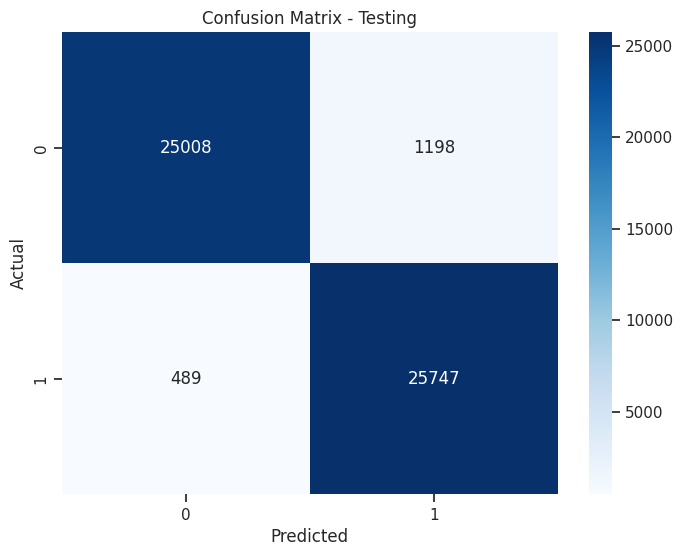



DecisionTreeClassifier
Accuracy train score: 1.0000
----------------------------------
Accuracy test score: 0.9998
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0124
- Mean Absolute Error: 0.0002
- R2 Score: 0.9994
----------------------------------
Classification Report - Training:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61197
         1.0       1.00      1.00      1.00     61167

    accuracy                           1.00    122364
   macro avg       1.00      1.00      1.00    122364
weighted avg       1.00      1.00      1.00    122364

----------------------------------
Classification Report - Testing:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26206
        

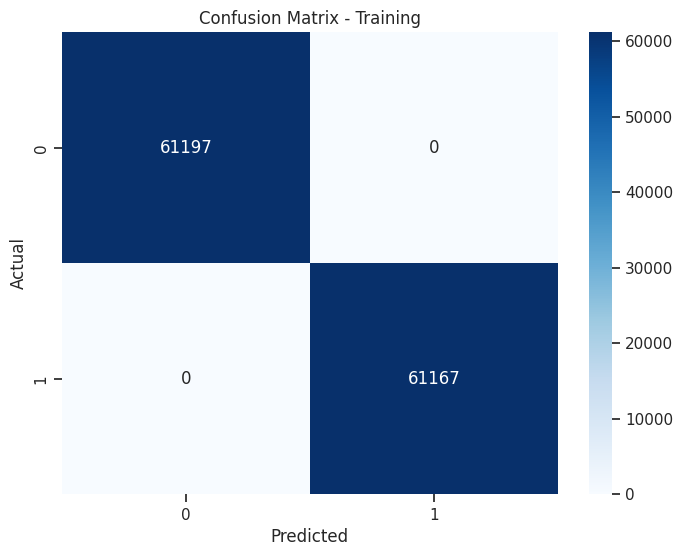

----------------------------------
Plot the confusion matrix for testing


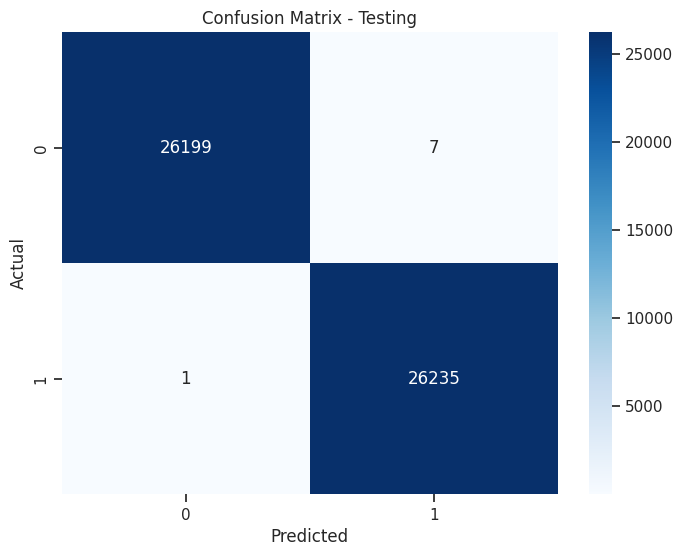



RandomForestClassifier
Accuracy train score: 1.0000
----------------------------------
Accuracy test score: 0.9998
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 0.0029
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0131
- Mean Absolute Error: 0.0002
- R2 Score: 0.9993
----------------------------------
Classification Report - Training:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61197
         1.0       1.00      1.00      1.00     61167

    accuracy                           1.00    122364
   macro avg       1.00      1.00      1.00    122364
weighted avg       1.00      1.00      1.00    122364

----------------------------------
Classification Report - Testing:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26206
        

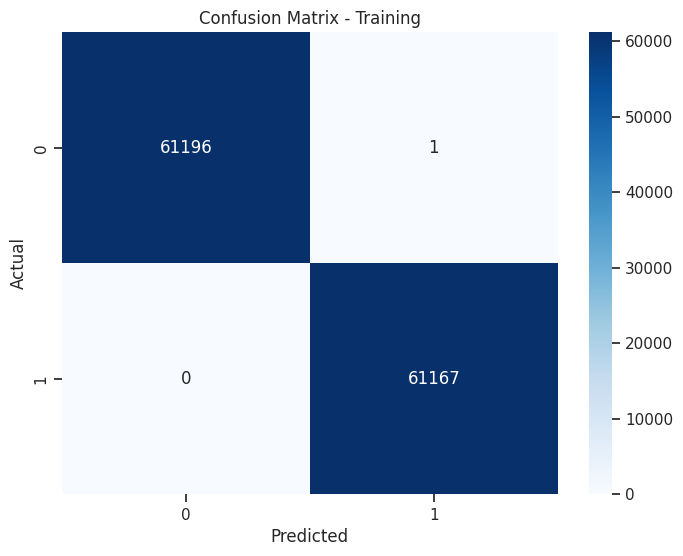

----------------------------------
Plot the confusion matrix for testing


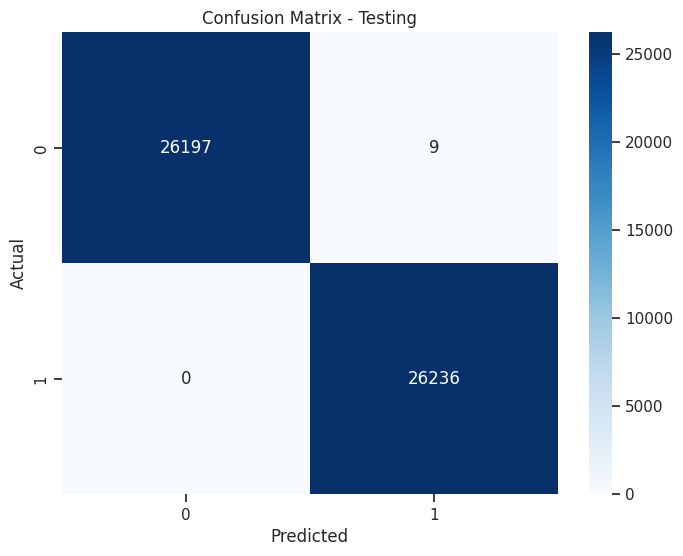



GaussianNB
Accuracy train score: 0.7860
----------------------------------
Accuracy test score: 0.7841
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 0.4626
- Mean Absolute Error: 0.2140
- R2 Score: 0.1441
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4646
- Mean Absolute Error: 0.2159
- R2 Score: 0.1366
----------------------------------
Classification Report - Training:
              precision    recall  f1-score   support

         0.0       0.94      0.61      0.74     61197
         1.0       0.71      0.96      0.82     61167

    accuracy                           0.79    122364
   macro avg       0.83      0.79      0.78    122364
weighted avg       0.83      0.79      0.78    122364

----------------------------------
Classification Report - Testing:
              precision    recall  f1-score   support

         0.0       0.94      0.61      0.74     26206
         1.0       0

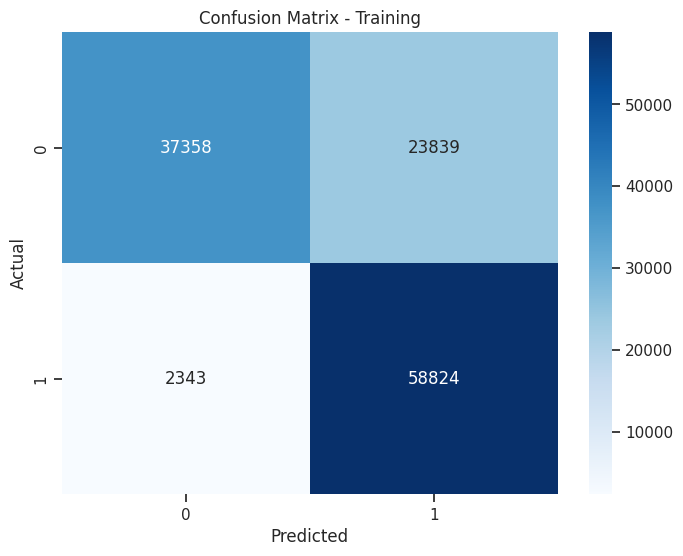

----------------------------------
Plot the confusion matrix for testing


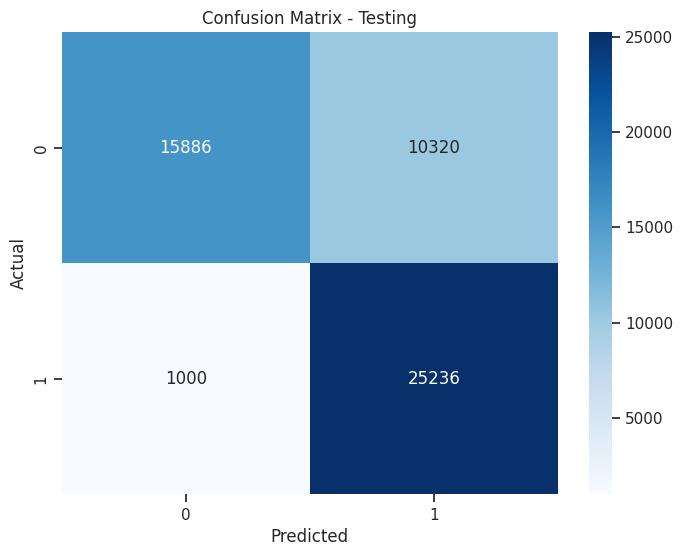

In [37]:
for model_name, model in models.items():
    evaluate_and_display(model, model_name, X_train, y_train, X_test, y_test)


In [38]:
print(f"The best model is ; {best_model} with test accuracy{best_accuracy:.4f}")

The best model is ; Decision Tree with test accuracy0.9998


# Model Training on ANN neural Network

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(7,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])


In [41]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [42]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
3824/3824 [==============================] - 5s 1ms/step - loss: 0.5159 - accuracy: 0.7428
Epoch 2/5
3824/3824 [==============================] - 5s 1ms/step - loss: 0.3326 - accuracy: 0.9052
Epoch 3/5
3824/3824 [==============================] - 5s 1ms/step - loss: 0.2183 - accuracy: 0.9445
Epoch 4/5
3824/3824 [==============================] - 5s 1ms/step - loss: 0.1664 - accuracy: 0.9486
Epoch 5/5
3824/3824 [==============================] - 5s 1ms/step - loss: 0.1391 - accuracy: 0.9533


In [43]:
y_pred_ANN = model.predict(X_test)

1639/1639 [==============================] - 2s 895us/step


In [44]:
y_pred_ANN = (y_pred_ANN > 0.5)

In [45]:
report = classification_report(y_test, y_pred_ANN)
print(report)


              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96     26206
         1.0       0.95      0.96      0.96     26236

    accuracy                           0.96     52442
   macro avg       0.96      0.96      0.96     52442
weighted avg       0.96      0.96      0.96     52442



In [46]:
cm_ANN = confusion_matrix(y_test, y_pred_ANN)

In [47]:
print(cm_ANN)

[[24863  1343]
 [  964 25272]]


Plot the confusion matrix for testing


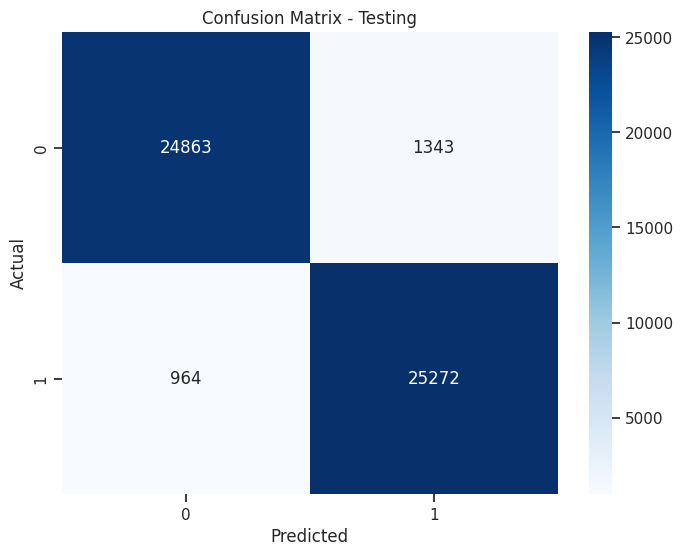

In [48]:
print("Plot the confusion matrix for testing")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ANN, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Testing")
plt.show()

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

# ...

def evaluate_and_display_rf(model, model_name, X_scaled, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    auroc_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train_rf, X_test_rf = X.iloc[train_idx], X.iloc[test_idx]
        y_train_rf, y_test_rf = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train_rf, y_train_rf)

        y_test_probs = model.predict_proba(X_test_rf)[:, 1]
        test_roc_auc = roc_auc_score(y_test_rf, y_test_probs)
        auroc_scores.append(test_roc_auc)

    mean_auroc = np.mean(auroc_scores)

    print(f"Mean AUROC score: {mean_auroc:.4f}")

    # ...

# ...

best_rf_model = RandomForestClassifier()

evaluate_and_display_rf(best_rf_model, "Random Forest", X, y)


Mean AUROC score: 1.0000
